In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\GabrielMedina\Desktop\Gitizin\tabela_aluguel_studios.xlsx')
df.head()

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
0,1,2470084910,Zap Imóveis,Jaguaré,Zona Oeste,São Paulo,Aluguel,0,0,1100,40,1,0,0,1,27.50
1,10,2470853274,Zap Imóveis,Ponte Pequena,Centro,São Paulo,Aluguel,9,700,3300,30,1,1,1,1,110.00
2,16,2471961576,Zap Imóveis,Brooklin,Zona Oeste,São Paulo,Aluguel,715,0,4000,139,1,0,1,1,28.78
3,19,2472362687,Zap Imóveis,Campos Elíseos,Centro,São Paulo,Aluguel,35000,0,160000,11200,1,0,99,0,14.29
4,23,2472749891,Zap Imóveis,Indianópolis,Zona Sul,São Paulo,Aluguel,0,850,3500,41,1,1,1,1,85.37


In [3]:
df.shape

(47587, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47587 entries, 0 to 47586
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        47587 non-null  int64  
 1   Id_Oferta         47587 non-null  int64  
 2   Portal            47587 non-null  object 
 3   Bairro            47587 non-null  object 
 4   Zona              47587 non-null  object 
 5   Cidade            47587 non-null  object 
 6   Status            47587 non-null  object 
 7   Valor_Iptu        47587 non-null  int64  
 8   Valor_Condominio  47587 non-null  int64  
 9   Valor_Aluguel     47587 non-null  int64  
 10  Area_Privativa    47587 non-null  int64  
 11  Dormitorios       47587 non-null  int64  
 12  Suites            47587 non-null  int64  
 13  Vagas             47587 non-null  int64  
 14  Banheiros         47587 non-null  int64  
 15  Aluguel_m2        47584 non-null  float64
dtypes: float64(1), int64(10), object(5)
memo

In [5]:
df.isna().any().sum()

1

In [6]:
df.dropna(inplace=True)
df.isna().any().sum()

0

In [9]:
dfbv = df[df['Bairro'] == 'Bela Vista']
dfbv

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
12,84,2477758975,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,200,1500,2500,35,1,1,1,1,71.43
13,85,2477798580,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,128,550,1000,45,1,0,0,1,22.22
31,195,2478720747,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,282,1760,5000,109,1,1,2,0,45.87
32,215,2480648683,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,11,412,2470,65,1,1,0,1,38.00
33,219,2480800194,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,300,900,4500,44,1,1,1,1,102.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47494,226866,2500426908,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,9,642,2300,39,1,1,1,1,58.97
47496,226876,2500427491,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,106,490,7700,50,1,1,1,1,154.00
47501,226891,2500432398,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,140,600,2500,42,1,1,1,1,59.52
47569,227325,2464975186,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,21,694,1250,34,1,0,1,1,36.76


In [10]:
dfbv['Area_Privativa'].describe()

count    4150.000000
mean       50.803614
std        81.900770
min        12.000000
25%        36.000000
50%        41.000000
75%        49.000000
max      3535.000000
Name: Area_Privativa, dtype: float64

In [11]:
dfbv['Aluguel_m2'].describe()

count    4150.000000
mean       59.583993
std       150.355113
min         0.850000
25%        40.320000
50%        55.000000
75%        70.000000
max      9629.630000
Name: Aluguel_m2, dtype: float64

In [ ]:
# Analisando os limites inefriores e superiores das variáveis de aluguel e área

In [12]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    lim_inf = q1 - 1.5 * amp
    lim_sup = q3 + 1.5 * amp
    return lim_inf, lim_sup

In [13]:
limites(dfbv['Area_Privativa'])

(16.5, 68.5)

In [14]:
limites(dfbv['Aluguel_m2'])

(-4.199999999999996, 114.52)

In [15]:
limites(dfbv['Valor_Aluguel'])

(-200.0, 4600.0)

In [16]:
# Coletando a mediana e o Q3 da tabela df para cercear o estudo nos imóveis entre os Q2 e Q3

medianabv = np.percentile(dfbv.Aluguel_m2, 50)
q3bv = np.percentile(dfbv.Aluguel_m2, 75)
print(medianabv)
print(q3bv)

55.0
70.0


In [17]:
bv_ = dfbv[(dfbv.Aluguel_m2 >= medianabv) & (dfbv.Aluguel_m2 <= q3bv)]
print(bv_)

       Unnamed: 0   Id_Oferta       Portal      Bairro    Zona     Cidade  \
175           897  2474831407  Zap Imóveis  Bela Vista  Centro  São Paulo   
242          1314  2476902586  Zap Imóveis  Bela Vista  Centro  São Paulo   
388          2141  2480227443  Zap Imóveis  Bela Vista  Centro  São Paulo   
401          2182  2475075203  Zap Imóveis  Bela Vista  Centro  São Paulo   
431          2378  2477403793  Zap Imóveis  Bela Vista  Centro  São Paulo   
...           ...         ...          ...         ...     ...        ...   
47300      225971  2500219602  Zap Imóveis  Bela Vista  Centro  São Paulo   
47355      226220  2500277648  Zap Imóveis  Bela Vista  Centro  São Paulo   
47454      226696  2500352280  Zap Imóveis  Bela Vista  Centro  São Paulo   
47494      226866  2500426908  Zap Imóveis  Bela Vista  Centro  São Paulo   
47501      226891  2500432398  Zap Imóveis  Bela Vista  Centro  São Paulo   

        Status  Valor_Iptu  Valor_Condominio  Valor_Aluguel  Area_Privativa

In [18]:
# Transformando num dataframe legível

df_bv = pd.DataFrame(data=bv_)
display(df_bv)

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
175,897,2474831407,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,25,480,2000,36,1,0,1,1,55.56
242,1314,2476902586,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,160,610,2700,41,1,0,1,1,65.85
388,2141,2480227443,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,157,475,2640,42,1,1,1,1,62.86
401,2182,2475075203,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,600,2500,45,1,0,0,0,55.56
431,2378,2477403793,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,80,730,3000,50,1,0,1,1,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47300,225971,2500219602,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,147,416,2800,40,1,0,1,1,70.00
47355,226220,2500277648,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,100,463,2100,37,1,0,1,1,56.76
47454,226696,2500352280,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,30,260,1950,28,1,0,0,1,69.64
47494,226866,2500426908,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,9,642,2300,39,1,1,1,1,58.97


In [19]:
df_bv['Area_Privativa'].describe()

count    1047.000000
mean       45.323782
std        40.066952
min        20.000000
25%        37.000000
50%        40.000000
75%        45.000000
max       839.000000
Name: Area_Privativa, dtype: float64

In [20]:
# CALCULANDO O LIMITE SUPERIOR DA ÁREA E INTERQUARTIL DO DATASET

limites(df_bv['Area_Privativa'])

(25.0, 57.0)

In [22]:
df_bv = df_bv[df_bv.Area_Privativa <= 57.0]
df_bv

,Unnamed: 0,Id_Oferta,Portal,Bairro,Zona,Cidade,Status,Valor_Iptu,Valor_Condominio,Valor_Aluguel,Area_Privativa,Dormitorios,Suites,Vagas,Banheiros,Aluguel_m2
175,897,2474831407,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,25,480,2000,36,1,0,1,1,55.56
242,1314,2476902586,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,160,610,2700,41,1,0,1,1,65.85
388,2141,2480227443,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,157,475,2640,42,1,1,1,1,62.86
401,2182,2475075203,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,0,600,2500,45,1,0,0,0,55.56
431,2378,2477403793,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,80,730,3000,50,1,0,1,1,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47300,225971,2500219602,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,147,416,2800,40,1,0,1,1,70.00
47355,226220,2500277648,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,100,463,2100,37,1,0,1,1,56.76
47454,226696,2500352280,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,30,260,1950,28,1,0,0,1,69.64
47494,226866,2500426908,Zap Imóveis,Bela Vista,Centro,São Paulo,Aluguel,9,642,2300,39,1,1,1,1,58.97


In [24]:
databv = df_bv.groupby(['Area_Privativa']).Aluguel_m2.agg(['min', 'max', 'mean', 'std', 'size'])
databv.replace(np.nan, 0, inplace=True)
display(databv)

,min,max,mean,std,size
Area_Privativa,,,,,
20,65.00,69.70,66.566667,2.713546,3
22,56.82,68.18,61.363333,6.011525,3
23,59.78,69.57,64.675000,6.922575,2
25,55.20,70.00,63.245333,5.298946,15
26,58.92,65.38,61.946667,3.249143,3
27,55.56,66.67,61.114000,5.555000,5
28,56.79,69.64,63.165625,4.266305,16
29,55.17,62.07,59.021667,3.238830,6
30,55.00,70.00,60.419500,4.915167,40


In [25]:
databv_ = df_bv.groupby(['Area_Privativa']).Valor_Aluguel.agg(['min', 'max', 'mean', 'std', 'size'])
databv_.replace(np.nan, 0, inplace=True)
display(databv_)

,min,max,mean,std,size
Area_Privativa,,,,,
20,1300,1394,1331.333333,54.270925,3
22,1250,1500,1350.000000,132.287566,3
23,1375,1600,1487.500000,159.099026,2
25,1380,1750,1581.133333,132.473645,15
26,1532,1700,1610.666667,84.506410,3
27,1500,1800,1650.000000,150.000000,5
28,1590,1950,1768.625000,119.482704,16
29,1600,1800,1711.666667,93.897107,6
30,1650,2100,1812.550000,147.447505,40


In [26]:
def hist_col_num(df, col_num):
    '''
    Pega o dataframe, as colunas numéricas como lista
    Retorna um grupo de histogramas com  elas
    
    '''
    f = pd.melt(df, value_vars=col_num) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

<Figure size 1440x720 with 0 Axes>

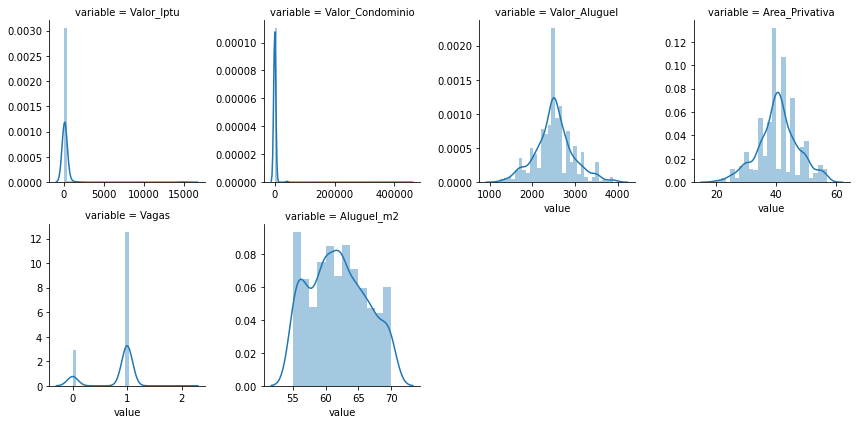

In [27]:
plt.figure(figsize=(20,10))
hist_col_num(df_bv, df_bv[['Valor_Iptu', 'Valor_Condominio', 'Valor_Aluguel', 'Area_Privativa', 'Vagas', 'Aluguel_m2']])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '20'),
  Text(1, 0, '22'),
  Text(2, 0, '23'),
  Text(3, 0, '25'),
  Text(4, 0, '26'),
  Text(5, 0, '27'),
  Text(6, 0, '28'),
  Text(7, 0, '29'),
  Text(8, 0, '30'),
  Text(9, 0, '31'),
  Text(10, 0, '32'),
  Text(11, 0, '33'),
  Text(12, 0, '34'),
  Text(13, 0, '35'),
  Text(14, 0, '36'),
  Text(15, 0, '37'),
  Text(16, 0, '38'),
  Text(17, 0, '39'),
  Text(18, 0, '40'),
  Text(19, 0, '41'),
  Text(20, 0, '42'),
  Text(21, 0, '43'),
  Text(22, 0, '44'),
  Text(23, 0, '45'),
  Text(24, 0, '46'),
  Text(25, 0, '47'),
  Text(26, 0, '48'),
  Text(27, 0, '49'),
  Text(28, 0, '50'),
  Text(29, 0, '51'),
  Text(30, 0, '52'),
  Text(31, 0, '53'),
  Text(32, 0, '54'),
  Text(33, 0, '55'),
  Text(34, 0, '56'),
  Text(35, 0, '57')])

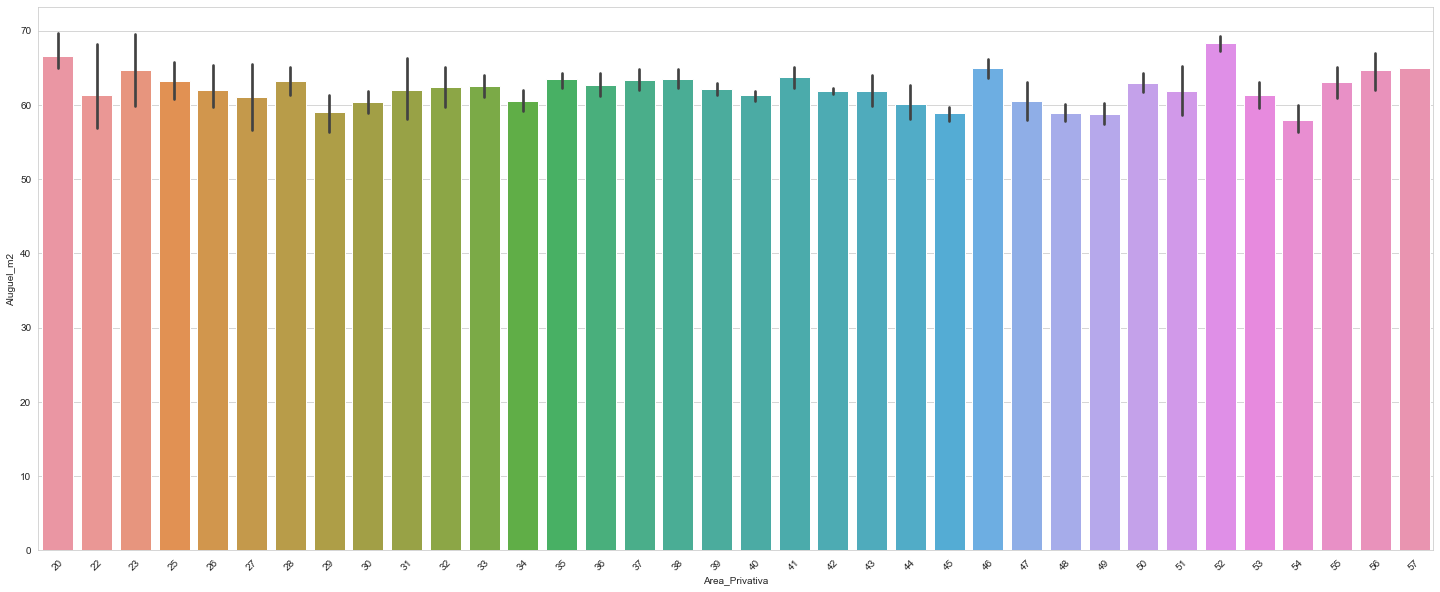

In [34]:
plt.figure(figsize=(25,10))
sns.barplot(x = df_bv['Area_Privativa'], y = df_bv['Aluguel_m2'])
plt.xticks(rotation=45)

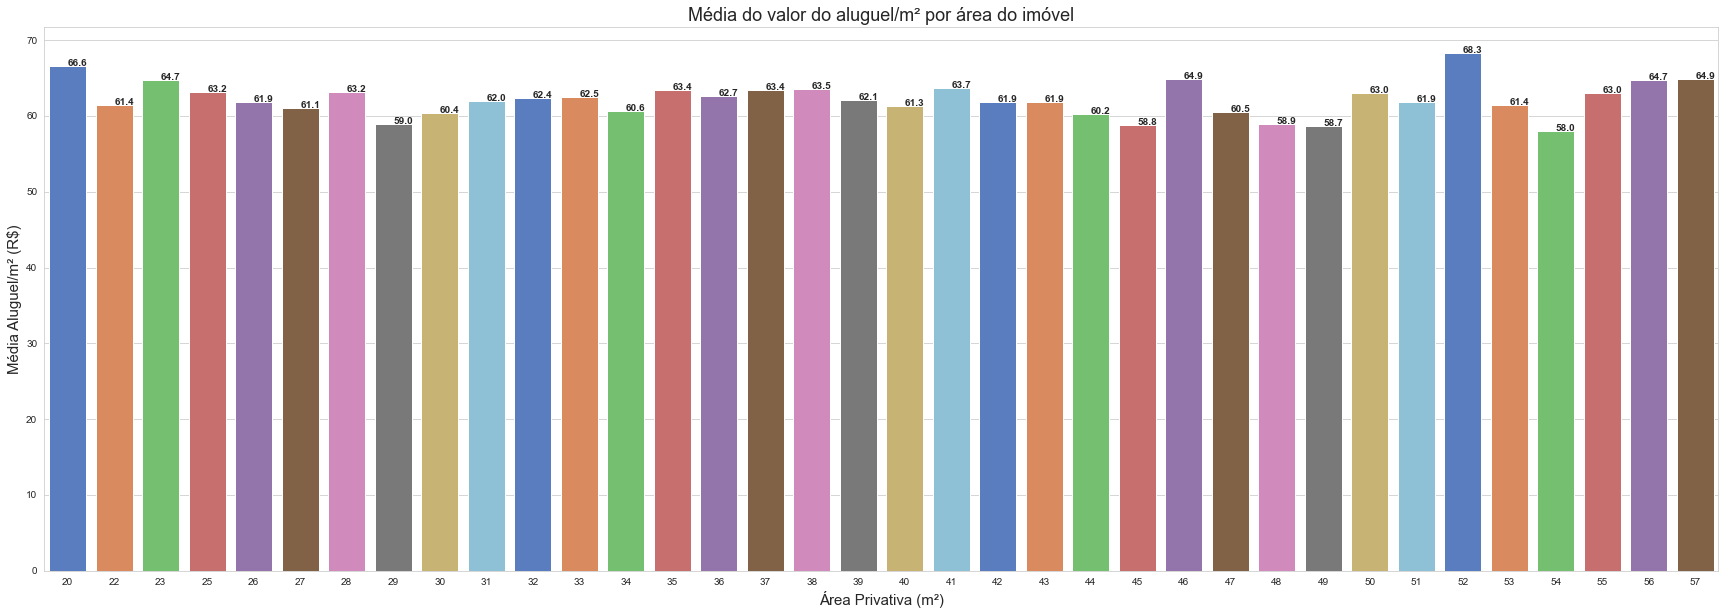

In [33]:
data_bv = df_bv.groupby('Area_Privativa').agg(media =('Aluguel_m2', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,10))
ax = sns.barplot(x=data_bv.index, y='media', data=data_bv, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel/m² por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Média Aluguel/m² (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )

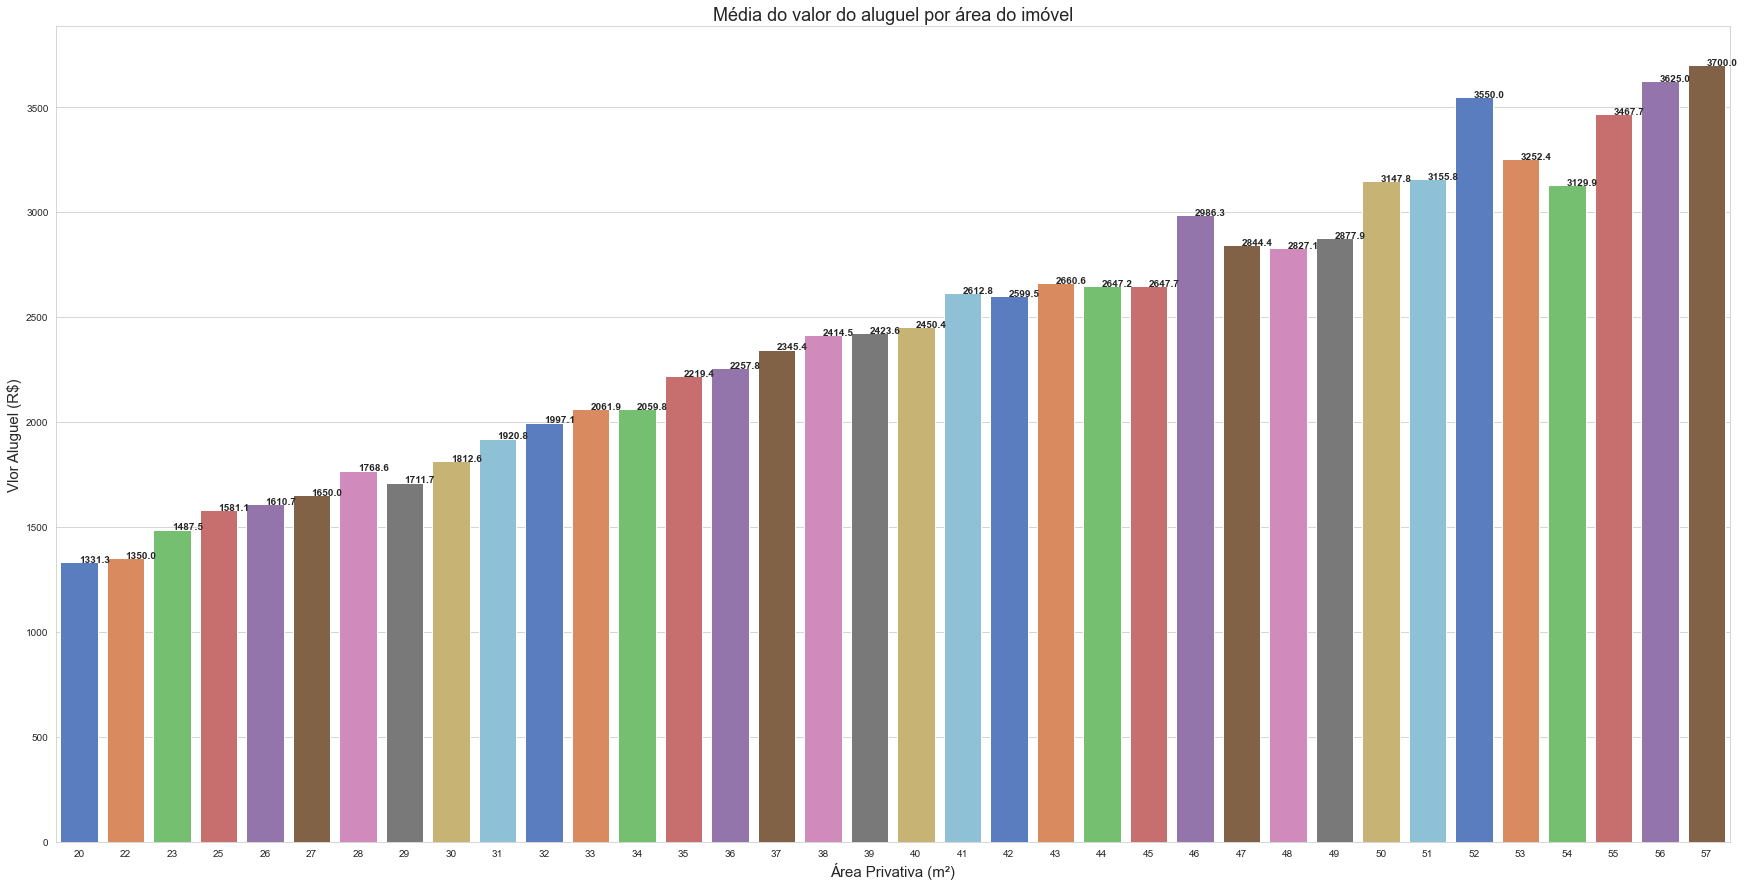

In [35]:
data_bv_ = df_bv.groupby('Area_Privativa').agg(media =('Valor_Aluguel', lambda p: p.mean())).round(1)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(30,15))
ax = sns.barplot(x=data_bv_.index, y='media', data=data_bv_, ci=None, palette="muted",orient='v', )
ax.set_title("Média do valor do aluguel por área do imóvel", fontsize=18)
ax.set_xlabel ("Área Privativa (m²)", fontsize=15)
ax.set_ylabel ("Vlor Aluguel (R$)", fontsize=15)
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),rect.get_height(), weight='bold' )
